## BSAN6070 CA-03 <br> Decision Trees
#### Tina Brauneck<br>2/22/2025

Description: This code demontrates machine learning using the decision tree algorithm from scikit learn. The process begings with data exploration and pre-processing.<br><br><br>

#### Table of Contents
##### &emsp; Step 1: Data Exploration and Pre-processing

&emsp; &emsp; &emsp; Setup <br>
&emsp; &emsp; &emsp; Data Quality Report <br>
&emsp; &emsp; &emsp; Bar Charts<br>
&emsp; &emsp; &emsp; Pre-processing<br>
&emsp; &emsp; &emsp; Correlation<br>

##### &emsp; Step 2: Decision Tree Modeling

&emsp; &emsp; &emsp; Initial Tree <br>
&emsp; &emsp; &emsp; Performance Check <br>
&emsp; &emsp; &emsp; Hyperparameter Variation & Performance Comparison <br>
&emsp; &emsp; &emsp; Choosing the Best Tree <br>
&emsp; &emsp; &emsp; Tree Visualization <br>

##### &emsp; Step 3: Predictor

&emsp; &emsp; &emsp; &emsp; User Input <br>
&emsp; &emsp; &emsp; &emsp; Prediction

##### &emsp; Questions & Answers

 <br><br>

## Step 1: Data Exploration & Pre-processing

### Setup

Environment setup and package imports:

In [382]:
# Optional installations. Uncomment and install if not already installed.
# pip install plotnine pandas
# pip install plotly
# pip install girth
# pip install --upgrade bottleneck
# pip install semopy
# conda install python-graphviz

In [383]:
#Package imports
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from plotnine import ggplot, aes, geom_histogram, facet_wrap, geom_bar
from plotnine.data import mpg
from sklearn import tree, metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

These next few steps put our data into a dataframe and provide a first look at the data.

In [386]:
df = pd.read_csv(r"https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true") # read in the data

In [387]:
## print the DataFrame's shape, i.e., number of rows and columns
print(df.shape)

(48842, 11)


In [388]:
df.head() #preview the data

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [389]:
df.tail() #preview the data

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


In [390]:
# This function determines if the feature is categorial or numerical

In [391]:
df.dtypes

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object

### Data Quality Report

In [394]:
# Setting display options so that the report will be readable
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [395]:
pd.set_option('display.width', 1000)

In [396]:
# Custom function for creating a data quality report

def data_quality_report(df, report_type):
    continuous_rows = []
    categorical_rows = []
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]): 
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            first_quartile = df[col].quantile(0.25)
            mean = df[col].mean()
            median = df[col].median()
            third_quartile = df[col].quantile(0.75)
            max_value = df[col].max()
            std_dev = df[col].std()
            
            continuous_rows.append({
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                '1st Qrt.': first_quartile,
                'Mean': mean,
                'Median': median,
                '3rd Qrt.': third_quartile,
                'Max': max_value,
                'Std. Dev.': std_dev
            })

        else:
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            value_counts = df[col].value_counts()
            mode = value_counts.index[0] if not value_counts.empty else 'NA'
            mode_freq = value_counts.iloc[0] if not value_counts.empty else 0
            mode_percentage = (mode_freq / count) * 100 if count > 0 else 0
            second_mode = value_counts.index[1] if len(value_counts) > 1 else 'NA'
            second_mode_freq = value_counts.iloc[1] if len(value_counts) > 1 else 0
            second_mode_percentage = (second_mode_freq / count) * 100 if count > 0 else 0

            categorical_rows.append({
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                'Mode': mode,
                'Mode Freq.': mode_freq,
                'Mode %': mode_percentage,
                '2nd Mode': second_mode,
                '2nd Mode Freq.': second_mode_freq,
                '2nd Mode %': second_mode_percentage
            })

    continuous_report = pd.DataFrame(continuous_rows)
    categorical_report = pd.DataFrame(categorical_rows)

    if report_type == "cont":
        return continuous_report

    elif report_type == "cat":
        return categorical_report
        
    else:
        raise ValueError("Error: report type options are 'cat' or 'cont'")

In [397]:
dqr_cont = data_quality_report(df,"cont")

In [398]:
dqr_cat = data_quality_report(df,"cat")

#### Data Quality Report: Continuous Features

In [400]:
dqr_cont

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
0,y,48842,0.0,2,0.0,0.239282,0.0,0.0,1,0.426649


This is our target feature.

#### Data Quality Report: Categorical Features

In [403]:
dqr_cat

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,hours_per_week_bin,48842,0.0,5,b. 31-40,26639,54.541174,d. 41-50 & 61-70,9819,20.103599
1,occupation_bin,48842,0.0,5,c. Mid - Mid,13971,28.604480,b. Mid - Low,12947,26.507924
2,msr_bin,48842,0.0,3,c. High,22047,45.139429,b. Mid,15868,32.488432
3,capital_gl_bin,48842,0.0,3,a. = 0,42525,87.066459,c. > 0,4035,8.261332
4,race_sex_bin,48842,0.0,3,c. High,29737,60.884075,b. Mid,16457,33.694361
5,education_num_bin,48842,0.0,5,b. 9-12,30324,62.085910,c. 13,8025,16.430531
6,education_bin,48842,0.0,5,b. Mid,30324,62.085910,c. Bachelors,8025,16.430531
7,workclass_bin,48842,0.0,2,b. income,46012,94.205806,a. no income,2830,5.794194
8,age_bin,48842,0.0,5,e. 40-55,13963,28.588100,a. 0-25,9627,19.710495
9,flag,48842,0.0,2,train,32561,66.665984,test,16281,33.334016


#### Missing Data Checks

Show features with more than 60% of observations missing data.

In [406]:
dqr_cat[dqr_cat['% Missing'] > 60]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %


In [407]:
dqr_cont[dqr_cont['% Missing'] > 60]

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.


There is no missing data in this dataset.

#### Cardinality Checks

If a feature has cardinality of 1, we drop it, because it is no use; all the values are the same.

In [411]:
dqr_cat[dqr_cat['Card.'] == 1]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %


In [412]:
dqr_cont[dqr_cont['Card.'] == 1]

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.


In [413]:
# Checking for continuous features that have too low a cardinality. These may actually be encoded categorical features.
dqr_cont[dqr_cont['Card.'] < 30]

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
0,y,48842,0.0,2,0.0,0.239282,0.0,0.0,1,0.426649


This is our target column and it has a binary encoding of 0 and 1.

In [415]:
# Assign any encoded categorical columns to cont_convert so they are graphed as if they are categorical.
cont_convert = 'y'

In [416]:
# Checking for categorical features that have too high a cardinality. These may just be unique identifiers and can be dropped.
dqr_cat[dqr_cat['Card.'] > 50]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %


Our features are binned, so, as expected, they all have relatively low cadinality.

In [418]:
# Make a copy of the dataframe and assign it as our analytics base table (abt). The original df will remain unaltered.
abt=df.copy()

### Data Exploration

To start exploring, we divide the ABT dataframe into two feature sets: continuous features and categorical features.

In [421]:
# Declare empty lists for the categorical columns and the continuous columns
categorical_cols = []
continuous_cols = []

#Define continuous and categorial columns from the abt:
for col in abt.columns:
    if pd.api.types.is_numeric_dtype(abt[col]):
        continuous_cols.append(col)
    else:
        categorical_cols.append(col)

# Transfer any continous columns that were identified as encoded categorical columns in the cardinality checks.
continuous_cols.remove(cont_convert)
categorical_cols.append(cont_convert)

In [422]:
# Check the output
abt[categorical_cols].head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [423]:
# Check the output
abt[continuous_cols].head()

""
0
1
2
3
4


Since all our data is binned or encoded, we have no continuous columns.

#### Bar Plots

All of our data can be treated as categorical and graphed using bar charts, since it came binned. As we do not have access to the precise values for each observation, histograms will not be more effective.

In [427]:
from plotnine import (
    ggplot, aes, geom_bar, facet_wrap, theme_classic, theme, element_text, ggsave
)

# Melt categorical columns for visualization
abt_cat_melted = abt[categorical_cols].melt(var_name='column', value_name='value')

# Design bar plots 
cat_plot = (
    ggplot(abt_cat_melted, aes(x='value')) +
    geom_bar(fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=12, ncol=3, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(
        panel_spacing=0.005,  # Adjust space between panels
        figure_size=(10, 12),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=8),  # Increase facet label size
        axis_text_x=element_text(size=9, angle=20),
        axis_text=element_text(size=8),  # Increase axis text size
        axis_title=element_text(size=11),  # Adjust axis title size
        # plot_title=element_text(size=36)  # Uncomment for plot title size
    )
)

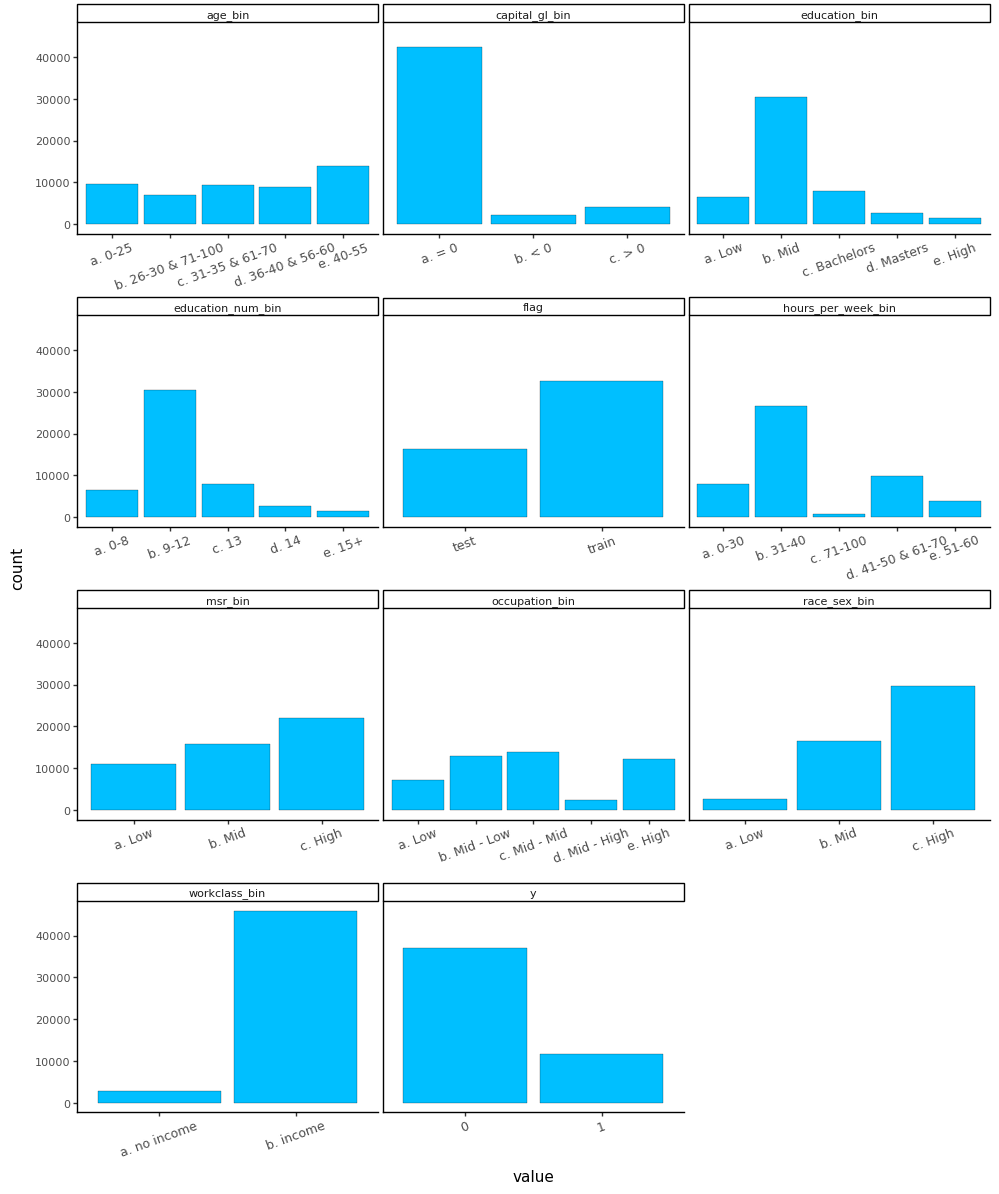

In [428]:
cat_plot.draw()

In [429]:
# optional: uncomment to save the visual
#from plotnine import ggsave
#cat_plot.save(filename='barplots.png') 

##### Bar Plots By Class and Feature

Next, we explore relationships in our data by comparing the fequency of out target class (>$50K) to the fequency of those outside that class, across different features.

In [432]:
# Melt categorical columns for visualization
abt_cat_melted = abt.melt(id_vars=['y'], value_vars=categorical_cols, var_name='column', value_name='value')

# Design bar plots 
y_plot = (
    ggplot(abt_cat_melted, aes(x='value', fill='factor(y)')) +
    geom_bar(position='dodge', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=12, ncol=3, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(
        panel_spacing=0.005,  # Adjust space between panels
        figure_size=(10, 12),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=8),  # Increase facet label size
        axis_text_x=element_text(size=9, angle=20),
        axis_text=element_text(size=8),  # Increase axis text size
        axis_title=element_text(size=11),  # Adjust axis title size
    )
)

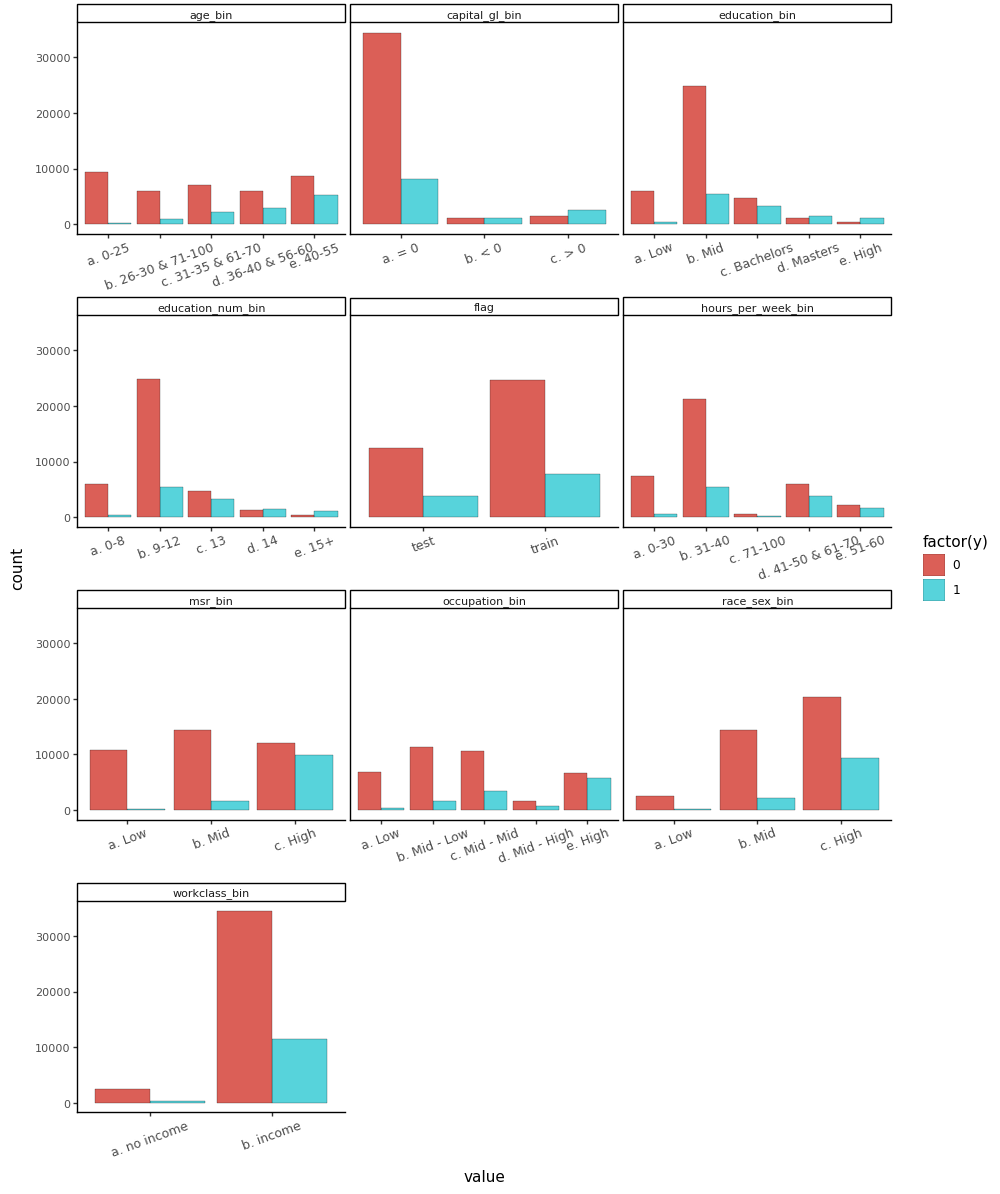

In [433]:
y_plot.draw()

From this visualization, it looks like our target class is associated with 'high' income, 'high' race_sex, 'high' msr, and education level of a bachelors degree and above. Note that the relative frequency of the target class [1] is higher for these features than the others; the aqua bars are closer in size to the adjacent red bar in these features. The highest relative frequency of our target class is associated with the 40-55 age group. 

### Pre-Processing

#### Imputation and Calculations

In [437]:
dqr_cat[dqr_cat['% Missing'] > 0]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %


There are no missing values, so we do not need to omit or impute data.

#### Outlier Handling

Given that our data has been binned already, there are no outliers to remove. Removing bins would create null predictions, so we will keep even the smallest bins.

#### Encoding

We will encode all features using label encoding.

In [443]:
# Function to encode a column based on its prefix.
# All the binned data starts with a letter, which we will use to map the label encoding.
def encode_column(column):
    column = column.astype(str)
    # Extract prefixes and suffixes
    prefixes = column.str[0]
    suffixes = column.str[1:]
    
    # Get unique prefixes and sort them
    unique_prefixes = sorted(prefixes.unique())
    prefix_mapping = {prefix: idx + 1 for idx, prefix in enumerate(unique_prefixes)}
    
    # Encode prefixes
    encoded_prefixes = prefixes.map(prefix_mapping)
    
    # Combine encoded prefixes with suffixes
    encoded_column = encoded_prefixes.astype(int)
    
    return encoded_column

In [444]:
# Make a copy of the abt. This will be encoded.
abt_encoded = abt.copy()

# Apply encoding to each column
for col in abt_encoded.drop(['y','flag'], axis=1, inplace = False).columns:
    abt_encoded[col + '_Encoded'] = encode_column(abt_encoded[col])

In [445]:
abt_encoded.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y,hours_per_week_bin_Encoded,occupation_bin_Encoded,msr_bin_Encoded,capital_gl_bin_Encoded,race_sex_bin_Encoded,education_num_bin_Encoded,education_bin_Encoded,workclass_bin_Encoded,age_bin_Encoded
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0,2,2,2,3,3,3,3,2,4
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0,1,5,3,1,3,3,3,2,5
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0,2,1,2,1,3,2,2,2,4
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0,2,1,3,1,2,1,1,2,5
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0,2,5,3,1,1,3,3,2,2


In [446]:
# Drop the old columns, keeping only the encoded columns
columns_to_keep = abt_encoded.filter(regex='_Encoded$').columns.tolist() + ['y', 'flag']
abt_encoded = abt_encoded[columns_to_keep]   
abt_encoded.head()

,hours_per_week_bin_Encoded,occupation_bin_Encoded,msr_bin_Encoded,capital_gl_bin_Encoded,race_sex_bin_Encoded,education_num_bin_Encoded,education_bin_Encoded,workclass_bin_Encoded,age_bin_Encoded,y,flag
0,2,2,2,3,3,3,3,2,4,0,train
1,1,5,3,1,3,3,3,2,5,0,train
2,2,1,2,1,3,2,2,2,4,0,train
3,2,1,3,1,2,1,1,2,5,0,train
4,2,5,3,1,1,3,3,2,2,0,train


In [447]:
abt_prepped = abt_encoded.copy()

<br>

### Cramer's V Correlation Matrix

In order to understand the relationship between features, we will use a correlation matrix. Cramer's matrix is suitable for categorical variables and ranges from 0 (no association) to 1 (high association).

In [451]:
abt_e = abt_encoded.drop(['flag'], axis = 1)

In [452]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

In [453]:
rows= []

for var1 in abt_e:
  col = []
  for var2 in abt_e :
    cramers =cramers_V(abt_e[var1], abt_e[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
matrix = pd.DataFrame(cramers_results, columns = abt_e.columns, index =abt_e.columns)



matrix

,hours_per_week_bin_Encoded,occupation_bin_Encoded,msr_bin_Encoded,capital_gl_bin_Encoded,race_sex_bin_Encoded,education_num_bin_Encoded,education_bin_Encoded,workclass_bin_Encoded,age_bin_Encoded,y
hours_per_week_bin_Encoded,1.00,0.14,0.22,0.08,0.17,0.11,0.11,0.19,0.16,0.27
occupation_bin_Encoded,0.14,1.00,0.20,0.10,0.18,0.28,0.28,0.41,0.12,0.35
msr_bin_Encoded,0.22,0.20,1.00,0.11,0.31,0.14,0.14,0.10,0.38,0.46
capital_gl_bin_Encoded,0.08,0.10,0.11,1.00,0.06,0.12,0.12,0.02,0.09,0.31
race_sex_bin_Encoded,0.17,0.18,0.31,0.06,1.00,0.07,0.07,0.06,0.09,0.23
education_num_bin_Encoded,0.11,0.28,0.14,0.12,0.07,1.00,1.00,0.09,0.10,0.36
education_bin_Encoded,0.11,0.28,0.14,0.12,0.07,1.00,1.00,0.09,0.10,0.36
workclass_bin_Encoded,0.19,0.41,0.10,0.02,0.06,0.09,0.09,1.00,0.14,0.08
age_bin_Encoded,0.16,0.12,0.38,0.09,0.09,0.10,0.10,0.14,1.00,0.32
y,0.27,0.35,0.46,0.31,0.23,0.36,0.36,0.08,0.32,1.00


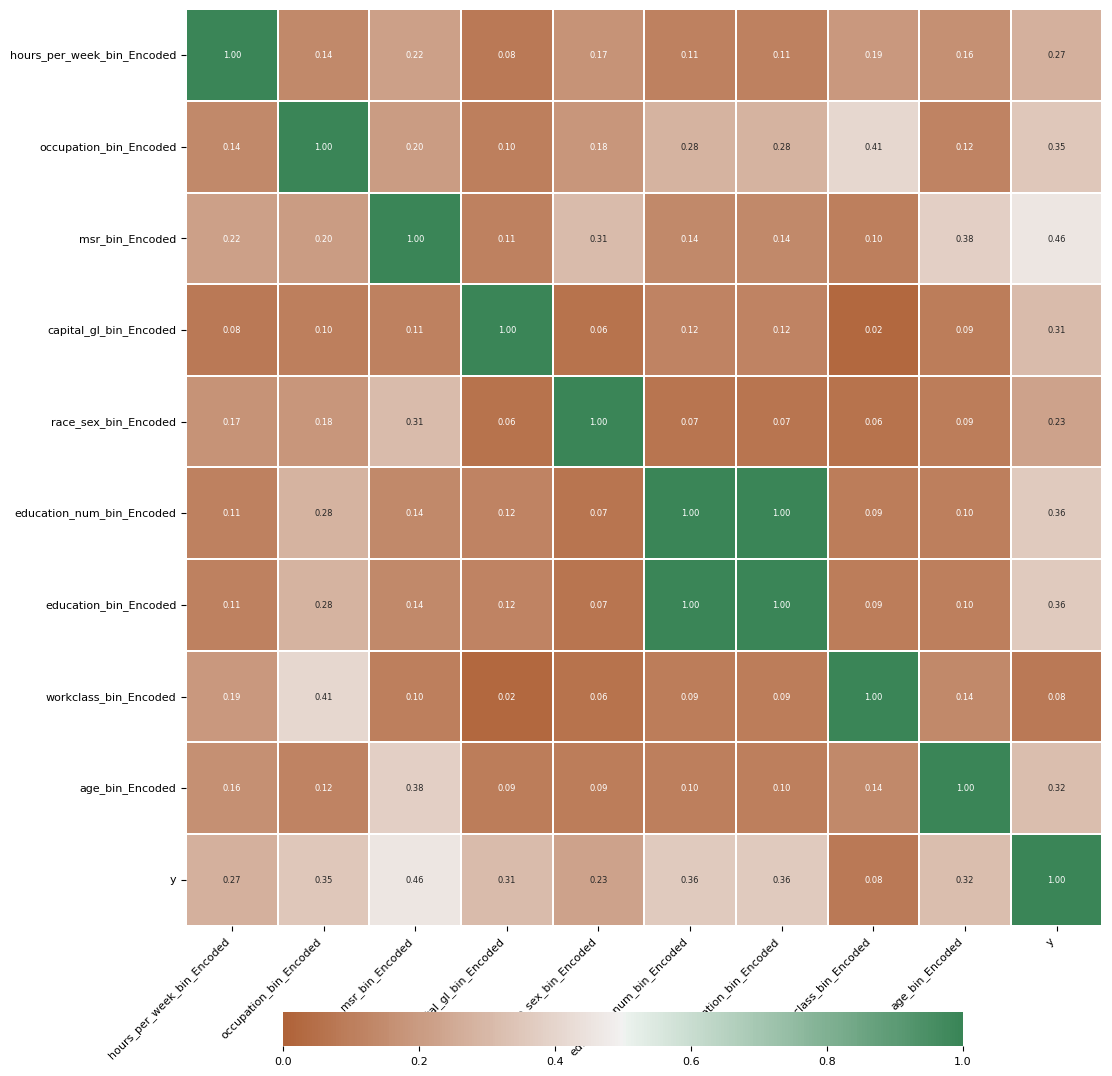

In [454]:
plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
matrix,
vmin=0, vmax=1, center=0.5,
cmap=sns.diverging_palette(30, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 6},  # Set font size for correlation coefficients
    linewidths=.1,  # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

This matrix shows us that the number of years of education bin is perfectly correlated with the education level bin. We can eliminate one of these features to improve our tree. <br>
There are no other correlations strong enough to warrant feature removal.

In [456]:
abt_prepped.drop('education_bin_Encoded', axis = 1, inplace = True)

In [457]:
abt_prepped.head()

,hours_per_week_bin_Encoded,occupation_bin_Encoded,msr_bin_Encoded,capital_gl_bin_Encoded,race_sex_bin_Encoded,education_num_bin_Encoded,workclass_bin_Encoded,age_bin_Encoded,y,flag
0,2,2,2,3,3,3,2,4,0,train
1,1,5,3,1,3,3,2,5,0,train
2,2,1,2,1,3,2,2,4,0,train
3,2,1,3,1,2,1,2,5,0,train
4,2,5,3,1,1,3,2,2,0,train


### Step 2: Decision Tree Modeling

In [459]:
# Define the learning algorithm and its parameters

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10, random_state=777, max_features=None, min_samples_leaf=15)

In [460]:
# Split the abt into two sets, one for training and one for validation.
train = abt_prepped[abt_prepped['flag'] == 'train']
test = abt_prepped[abt_prepped['flag'] == 'test']

In [461]:
# Split both the training an test sets into x (attributes) and y (taret features)
x_train = train.drop(['y','flag'], axis=1, inplace = False)
y_train = train['y']

x_test = test.drop(['y','flag'], axis=1, inplace = False)
y_test = test['y']

In [462]:
x_train.head()

,hours_per_week_bin_Encoded,occupation_bin_Encoded,msr_bin_Encoded,capital_gl_bin_Encoded,race_sex_bin_Encoded,education_num_bin_Encoded,workclass_bin_Encoded,age_bin_Encoded
0,2,2,2,3,3,3,2,4
1,1,5,3,1,3,3,2,5
2,2,1,2,1,3,2,2,4
3,2,1,3,1,2,1,2,5
4,2,5,3,1,1,3,2,2


In [463]:
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)

### Performance Check

A confusion matrix shows us how many predictions in the target class were actually in the target class (true positive or 1:1) as well as how many predictions in the target class actually were not in the target class (false positive or 0:1).

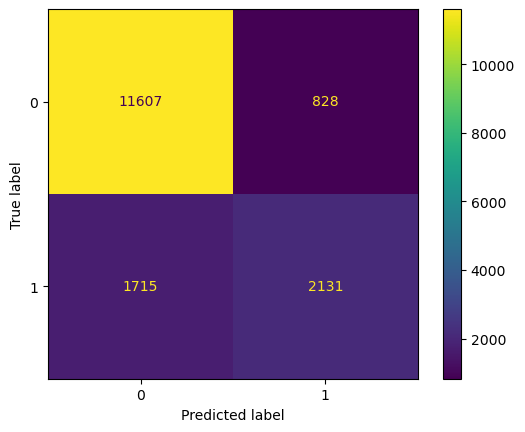

In [466]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

Here, we see our tree had 2,131 true positives, 11,607 true negatives, 828 false positives, and 1,715 false negatives. Observe that the target class has less observations than the remainder of the dataset.

In [468]:
accuracy_score(y_test, y_pred)

0.8438056630428107

In [469]:
recall_score(y_test, y_pred, average='macro')

0.7437479573971861

In [470]:
precision_score(y_test, y_pred, average='macro')

0.7957206553925009

In [471]:
f1_score(y_test, y_pred, average='macro')

0.7637868729435515

#### Hyperparameter Variation & Performance Comparison

In [473]:
# Creating a function for reporting performance parameters

def perf(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    perf_results = {'accuracy': accuracy, 'recall':recall, 'precision':precision, 'f1 score':f1}

    return perf_results

In [474]:
# Creating a function to vary the hyperparameters and record their performance.

def vary_hyp(hyperparams, hyp_value, x_train, y_train, x_test, y_test):
    # Initialize hyperparameter values
    hyperparam_defaults = {
        'criterion': 'gini',
        'max_depth': 10,
        'random_state': 777,  # This parameter will not change
        'max_features': None,
        'min_samples_leaf': 15
    }

    lst_perf = []  # Initialize empty list to store the performance results

    # Loop on hyp -- change the hyperparameter being varied
    for hyp in hyperparams:
        hyp_values = hyp_value[hyp]
        
        for val in hyp_values:
            # Set the hyperparameter value
            hyperparams_dict = hyperparam_defaults.copy()
            hyperparams_dict[hyp] = val

            # Initialize and train the decision tree
            dtree = DecisionTreeClassifier(**hyperparams_dict)
            dtree.fit(x_train, y_train)
            y_pred = dtree.predict(x_test)

            # Append the results to the list
            lst_perf.append({
                'hyperparameter': hyp,
                'value': val,
                **perf(y_test, y_pred)
            })

    all_results = pd.DataFrame(lst_perf)
    return all_results

In [475]:
# Define the hyperparameters that will be varied and the values that will be tested.
hyperparams = ['criterion', 'min_samples_leaf', 'max_depth', 'max_features']
hyp_value = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': list(range(5, 41, 5)),
             'max_depth':list(range(2, 17, 2)), 'max_features': [None, .3, .4, .5, .6, .7, .8]}

In [476]:
perf_df = vary_hyp(hyperparams=hyperparams, hyp_value=hyp_value, x_train=x_train, y_train=y_train,x_test=x_test, y_test=y_test)

In [477]:
perf_df

,hyperparameter,value,accuracy,recall,precision,f1 score
0,criterion,gini,0.843806,0.743748,0.795721,0.763787
1,criterion,entropy,0.844543,0.747194,0.795725,0.766262
2,min_samples_leaf,5,0.842946,0.745430,0.792864,0.764113
3,min_samples_leaf,10,0.843744,0.747479,0.793738,0.765836
4,min_samples_leaf,15,0.843806,0.743748,0.795721,0.763787
5,min_samples_leaf,20,0.844236,0.745287,0.795957,0.764970
6,min_samples_leaf,25,0.844113,0.746104,0.795255,0.765340
7,min_samples_leaf,30,0.844174,0.744348,0.796293,0.764395
8,min_samples_leaf,35,0.844113,0.742871,0.796927,0.763509
9,min_samples_leaf,40,0.843806,0.741772,0.796771,0.762655


In [478]:
perf_df[perf_df['f1 score'] == max(perf_df['f1 score'])]

,hyperparameter,value,accuracy,recall,precision,f1 score
13,max_depth,8,0.846508,0.755754,0.796213,0.772359


In [479]:
perf_df[perf_df['accuracy'] == max(perf_df['accuracy'])]

,hyperparameter,value,accuracy,recall,precision,f1 score
13,max_depth,8,0.846508,0.755754,0.796213,0.772359


Our best performing tree has an accuracy of 84.65%, though all trees performed similarly.

### Choosing the Best Tree

In [482]:
best_tree = DecisionTreeClassifier(criterion='gini', max_depth = 8, random_state=777, max_features=None, min_samples_leaf=10)

In [483]:
start_time = time.time()
best_tree.fit(x_train, y_train)
fit_time = time.time() - start_time
fit_time

0.02311992645263672

In [484]:
# The time to fit the model is calculated above. It takes a fraction of a second.

In [485]:
y_pred=best_tree.predict(x_test)

In [486]:
performance = perf(y_test, y_pred)

In [487]:
performance

{'accuracy': 0.8469381487623611,
 'recall': 0.7552272127073261,
 'precision': 0.7974069101599099,
 'f1 score': 0.772404161385562}

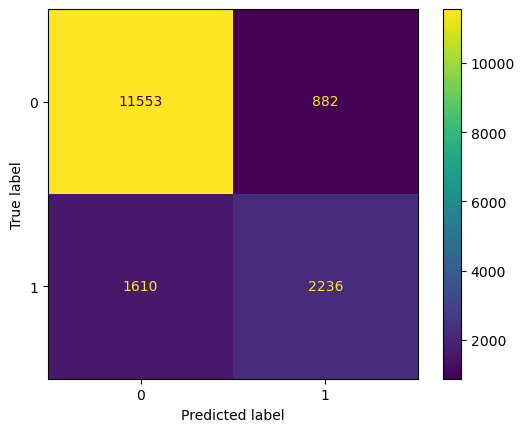

In [488]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Visualizing the Decision Tree

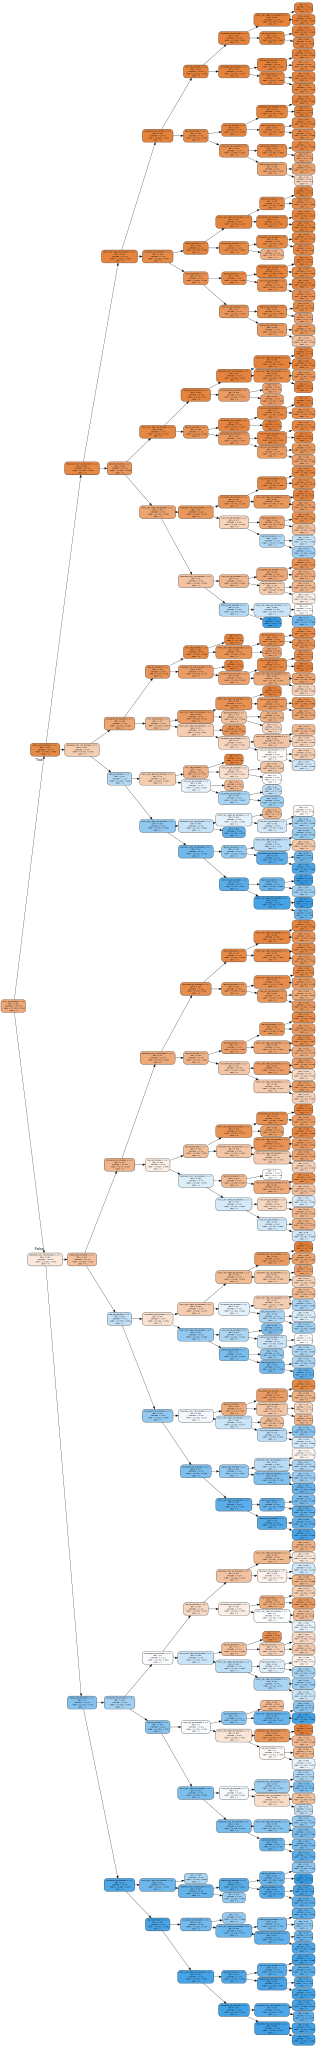

In [490]:
import graphviz

tree_graph = tree.export_graphviz(best_tree,
                                  out_file=None,
                                  feature_names=x_train.columns.tolist(),
                                  class_names=['0', '1'],
                                  filled=True,
                                  rounded=True,  # Rounded nodes for better readability
                                  special_characters=True,
                                  proportion=True,  # Adjust node size based on proportion
                                  rotate=True)  # Rotate the tree for horizontal layout

# Add graph attributes for node and rank separation, and node size
dot_data = tree_graph.replace('digraph Tree {', 'digraph Tree {\n  graph [nodesep=0.04, ranksep=0.04];\n  node [fontsize=8, width=0.5, height=0.5];')

# Use graphviz to create a graph from the adjusted DOT data
graph = graphviz.Source(dot_data, engine='dot')

graph.render('decision_tree')

# Display the graph
display(graph)

### Step 3: Predictor

In this section, a single prediction can be made using our best tree. To change the input, alter the user_input dictionary. Values should match bin formats from the initial dataset verbatim, except for hours, education years, and age, which can be entered as a number.

#### User Input

In [494]:
predictor_df = abt_prepped.copy()

In [495]:
predictor_df = predictor_df.drop(predictor_df.index)

In [496]:
predictor_df.head()

,hours_per_week_bin_Encoded,occupation_bin_Encoded,msr_bin_Encoded,capital_gl_bin_Encoded,race_sex_bin_Encoded,education_num_bin_Encoded,workclass_bin_Encoded,age_bin_Encoded,y,flag


In [497]:
user_input = {'hrs': 48, 'occ': 'b. Mid - Low', 'msr': 'c. High', 'gain': 'c. > 0', 'race-sex': 'b. Mid', 'ed_yrs': 12, 'ed': 'e. High', 'class': 'b. Income', 'age': 58}

In [498]:
abt['hours_per_week_bin'].unique()

array(['b. 31-40', 'a. 0-30', 'd. 41-50 & 61-70', 'c. 71-100', 'e. 51-60'],
      dtype=object)

In [499]:
if 26 <= user_input['age'] <= 30 or user_input['age'] >= 71:
    age_group = 'b. 26-30 & 71-100'
elif 31 <= user_input['age'] <= 35 or user_input['age'] >= 61:
    age_group = 'c. 31-35 & 61-70'
elif 36 <= user_input['age'] <= 40 or user_input['age'] >= 56:
    age_group = 'd. 36-40 & 56-60'
elif 41 <= user_input['age'] <= 55:
    age_group = 'e. 40-55'
else:
    age_group = 'a. 0-25'

print(age_group)

d. 36-40 & 56-60


In [500]:
if 0 <= user_input['ed_yrs'] <= 8:
    ed_group = 'a. 0-8'
elif 9 <= user_input['ed_yrs'] <= 12:
    ed_group = 'b. 9-12'
elif user_input['ed_yrs'] == 13:
    ed_group = 'c. 13'
elif user_input['ed_yrs'] == 14:
    ed_group = 'd. 14'
elif user_input['ed_yrs'] >= 15:
    ed_group = 'e. 15+'
else:
    ed_group = 'Unknown'

print(ed_group)

b. 9-12


In [501]:
if 0 <= user_input['hrs'] <= 30:
    hrs_group = 'a. 0-30'
elif 31 <= user_input['hrs'] <= 40:
    hrs_group = 'b. 31-40'
elif 41 <= user_input['hrs'] <= 50 or 61 <= user_input['hrs'] <= 70:
    hrs_group = 'd. 41-50 & 61-70'
elif 51 <= user_input['hrs'] <= 60:
    hrs_group = 'e. 51-60'
elif 71 <= user_input['hrs'] <= 100:
    hrs_group = 'c. 71-100'
else:
    hrs_group = 'Unknown'

print(hrs_group)

d. 41-50 & 61-70


In [502]:
pred_input = user_input

In [503]:
pred_input['age'] = age_group

In [504]:
pred_input['ed_yrs'] = ed_group

In [505]:
pred_input['hrs'] = hrs_group

In [506]:
pred_input

{'hrs': 'd. 41-50 & 61-70',
 'occ': 'b. Mid - Low',
 'msr': 'c. High',
 'gain': 'c. > 0',
 'race-sex': 'b. Mid',
 'ed_yrs': 'b. 9-12',
 'ed': 'e. High',
 'class': 'b. Income',
 'age': 'd. 36-40 & 56-60'}

In [507]:
# The new input needs to be encoded in the same way as the training data, so here we add the input as the first row in the dataset and perform the encoding again.
reencode = abt.copy()
reencode = reencode.drop(['y','flag'], axis=1)
reencode.iloc[0] = list(pred_input.values())
reencode.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,d. 41-50 & 61-70,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,e. High,b. Income,d. 36-40 & 56-60
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100


In [508]:
# Apply encoding to each column
for col in reencode.columns:
    reencode[col + '_Encoded'] = encode_column(reencode[col])

In [509]:
# Keep only the first row (the new user input data)
first_row_df = reencode.iloc[:1]

In [510]:
columns_to_keep = first_row_df.filter(regex='_Encoded$').columns.tolist()
first_row_df = first_row_df[columns_to_keep]   
first_row_df.drop('education_bin_Encoded', axis=1, inplace=True)

#### Prediction

In [512]:
pred=best_tree.predict(first_row_df)

In [513]:
print(f"Predicted income level is {'>$50K' if pred == 1 else '<$50K'}")

Predicted income level is >$50K


<br>

### Questions & Answers

##### Q.1 Why does it makes sense to discretize columns for this problem?

Decision trees rely on classification, and observations need to fit into discrete classes in order to allow the decision tree to develop appropriately. Decision trees have discrete branches, and the number of bins we choose determines in part the number of branches or nodes the tree will have when fully grown. Binning data limits the nodes, improving the program's runttime and overall performance. It also helps to ensure test data can match up with existing classes.

##### Q.2 What might be the issues (if any) if we DID NOT discretize the columns

If features were left continuous, there could be an extremely high number of nodes, resulting in poor performance. We also risk a null prediction since the input may not match one of the continuous values used during training. Limited bins allow the algorithim to classify like data in the same way and make predictions using the outcomes of similar data from the training set.

##### Q.3 Decision Tree Hyper-parameter variation vs. performance

In [521]:
perf_df[perf_df['accuracy'] == max(perf_df['accuracy'])]

,hyperparameter,value,accuracy,recall,precision,f1 score
13,max_depth,8,0.846508,0.755754,0.796213,0.772359


Max depth of 8 resulted in the highest accuracy and the highest F1 score when varying the hyper parameters individually. However, I found a slightly better performing tree when also using min_samples_leaf = 10.

##### Q.4 How long was your total run time to train the best model?

In [524]:
fit_time

0.02311992645263672

Runtime was only .03 seconds to fit the model.

##### Q.5 Did you find the BEST TREE?

It's unlikely I have identified the best tree, since I did not try all combinations of hyperparameters. However, the parameters performed similarly overall, the number of features is manageable, and the runtime is excellent, so attempting to improve upon this model further by varying the hyperparameters may not be worthwhile. In a sense, the best tree is the one that performs well and where any attempts to improve it diminishes the business's cost-benefit ratio.

##### Q.6 Write your observations from the visualization of the best tree

Not all of the nodes are pure by the end of the diagram. In other words, not all branches end in a leaf, but the sample percentage is very low for the nodes at the end of the tree, which indicates the majority of cases are addressed by the tree.

##### Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”)

The tree does not appear to be fully grown. When exploring the hyperparameter for maximum depth, a depth of 8 performed the best. Max depths of greater than 8 showed dimished performance, indicating the optimal depth is 8. Depths greater than this may be subject to overfitting.

##### Q.8 What is the probability that your prediction for this person is correct?

In [533]:
probabilities = best_tree.predict_proba(first_row_df)

In [534]:
probabilities

array([[0.28571429, 0.71428571]])

There is a 71% chance that the predicted value of 1: >$50K is correct.